In [1]:
from rebalancer.rebalancer import Rebalancer, CexDataLoader, TopNEqualDollarStrategy, DynamicEWMAStrategy

In [2]:
loader = CexDataLoader("binance")
symbols = loader.get_top_volume_symbols(50)
data = loader.fetch_history(symbols, since="2024-05-10T00:00:00Z")

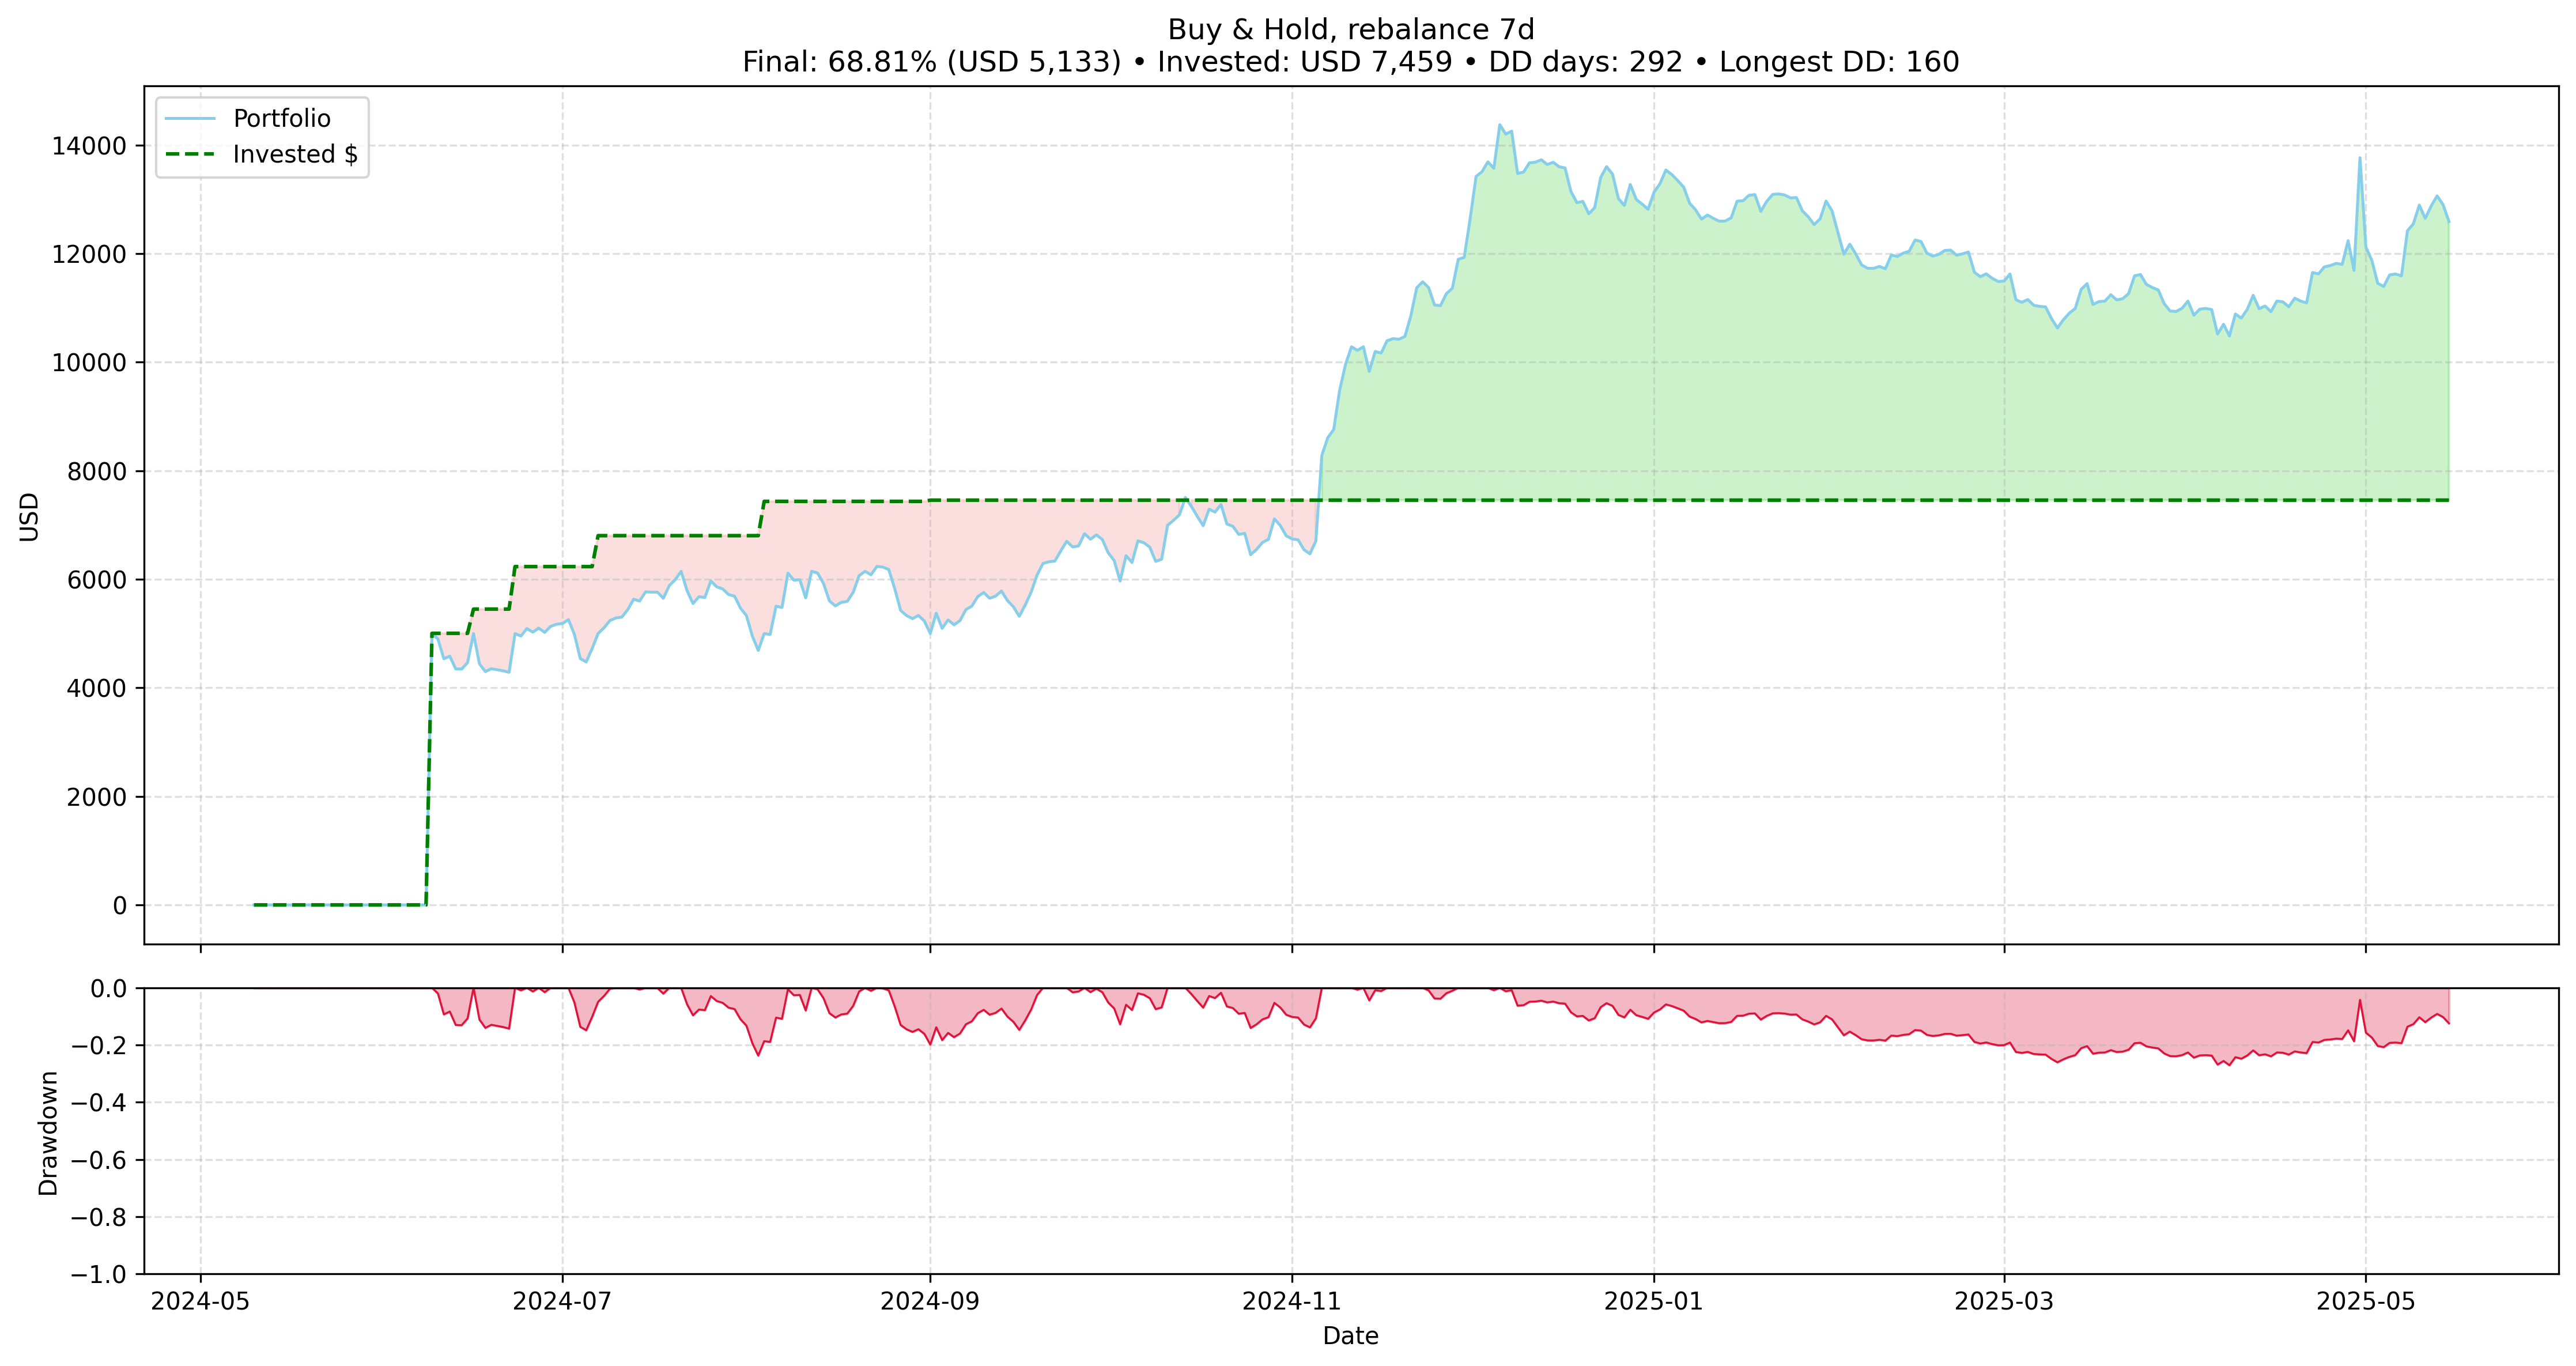

Final return      : 68.81% (USD 5,133)
Total invested    : USD 7,459
Time in drawdown  : 292 trading days
Longest DD period : 160 trading days

TOP gainers, USD
XRP/USDT     1,505.68
DOGE/USDT    1,397.98
CRV/USDT       920.23
RAY/USDT       775.68
SUI/USDT       762.19
dtype: object

TOP losers, USD
PEOPLE/USDT      -695.00
1000SATS/USDT    -425.55
AMP/USDT         -392.60
FLOKI/USDT       -259.80
EOS/USDT         -233.97
dtype: object

Traded volume, USD: 228,405.40


In [3]:
strategy = TopNEqualDollarStrategy(n_top=5, usd_per_strat=1_000)
rb = Rebalancer(data, strategy, lookback_days=30, rebalance_freq_days=7, fee_rate=0.001)
result = rb.run()    
Rebalancer.plot_equity(result.equity_curve, result.invested_curve,"Buy & Hold, rebalance 7d")
Rebalancer.report_top_movers(result.total_pnl, result.traded_volume)

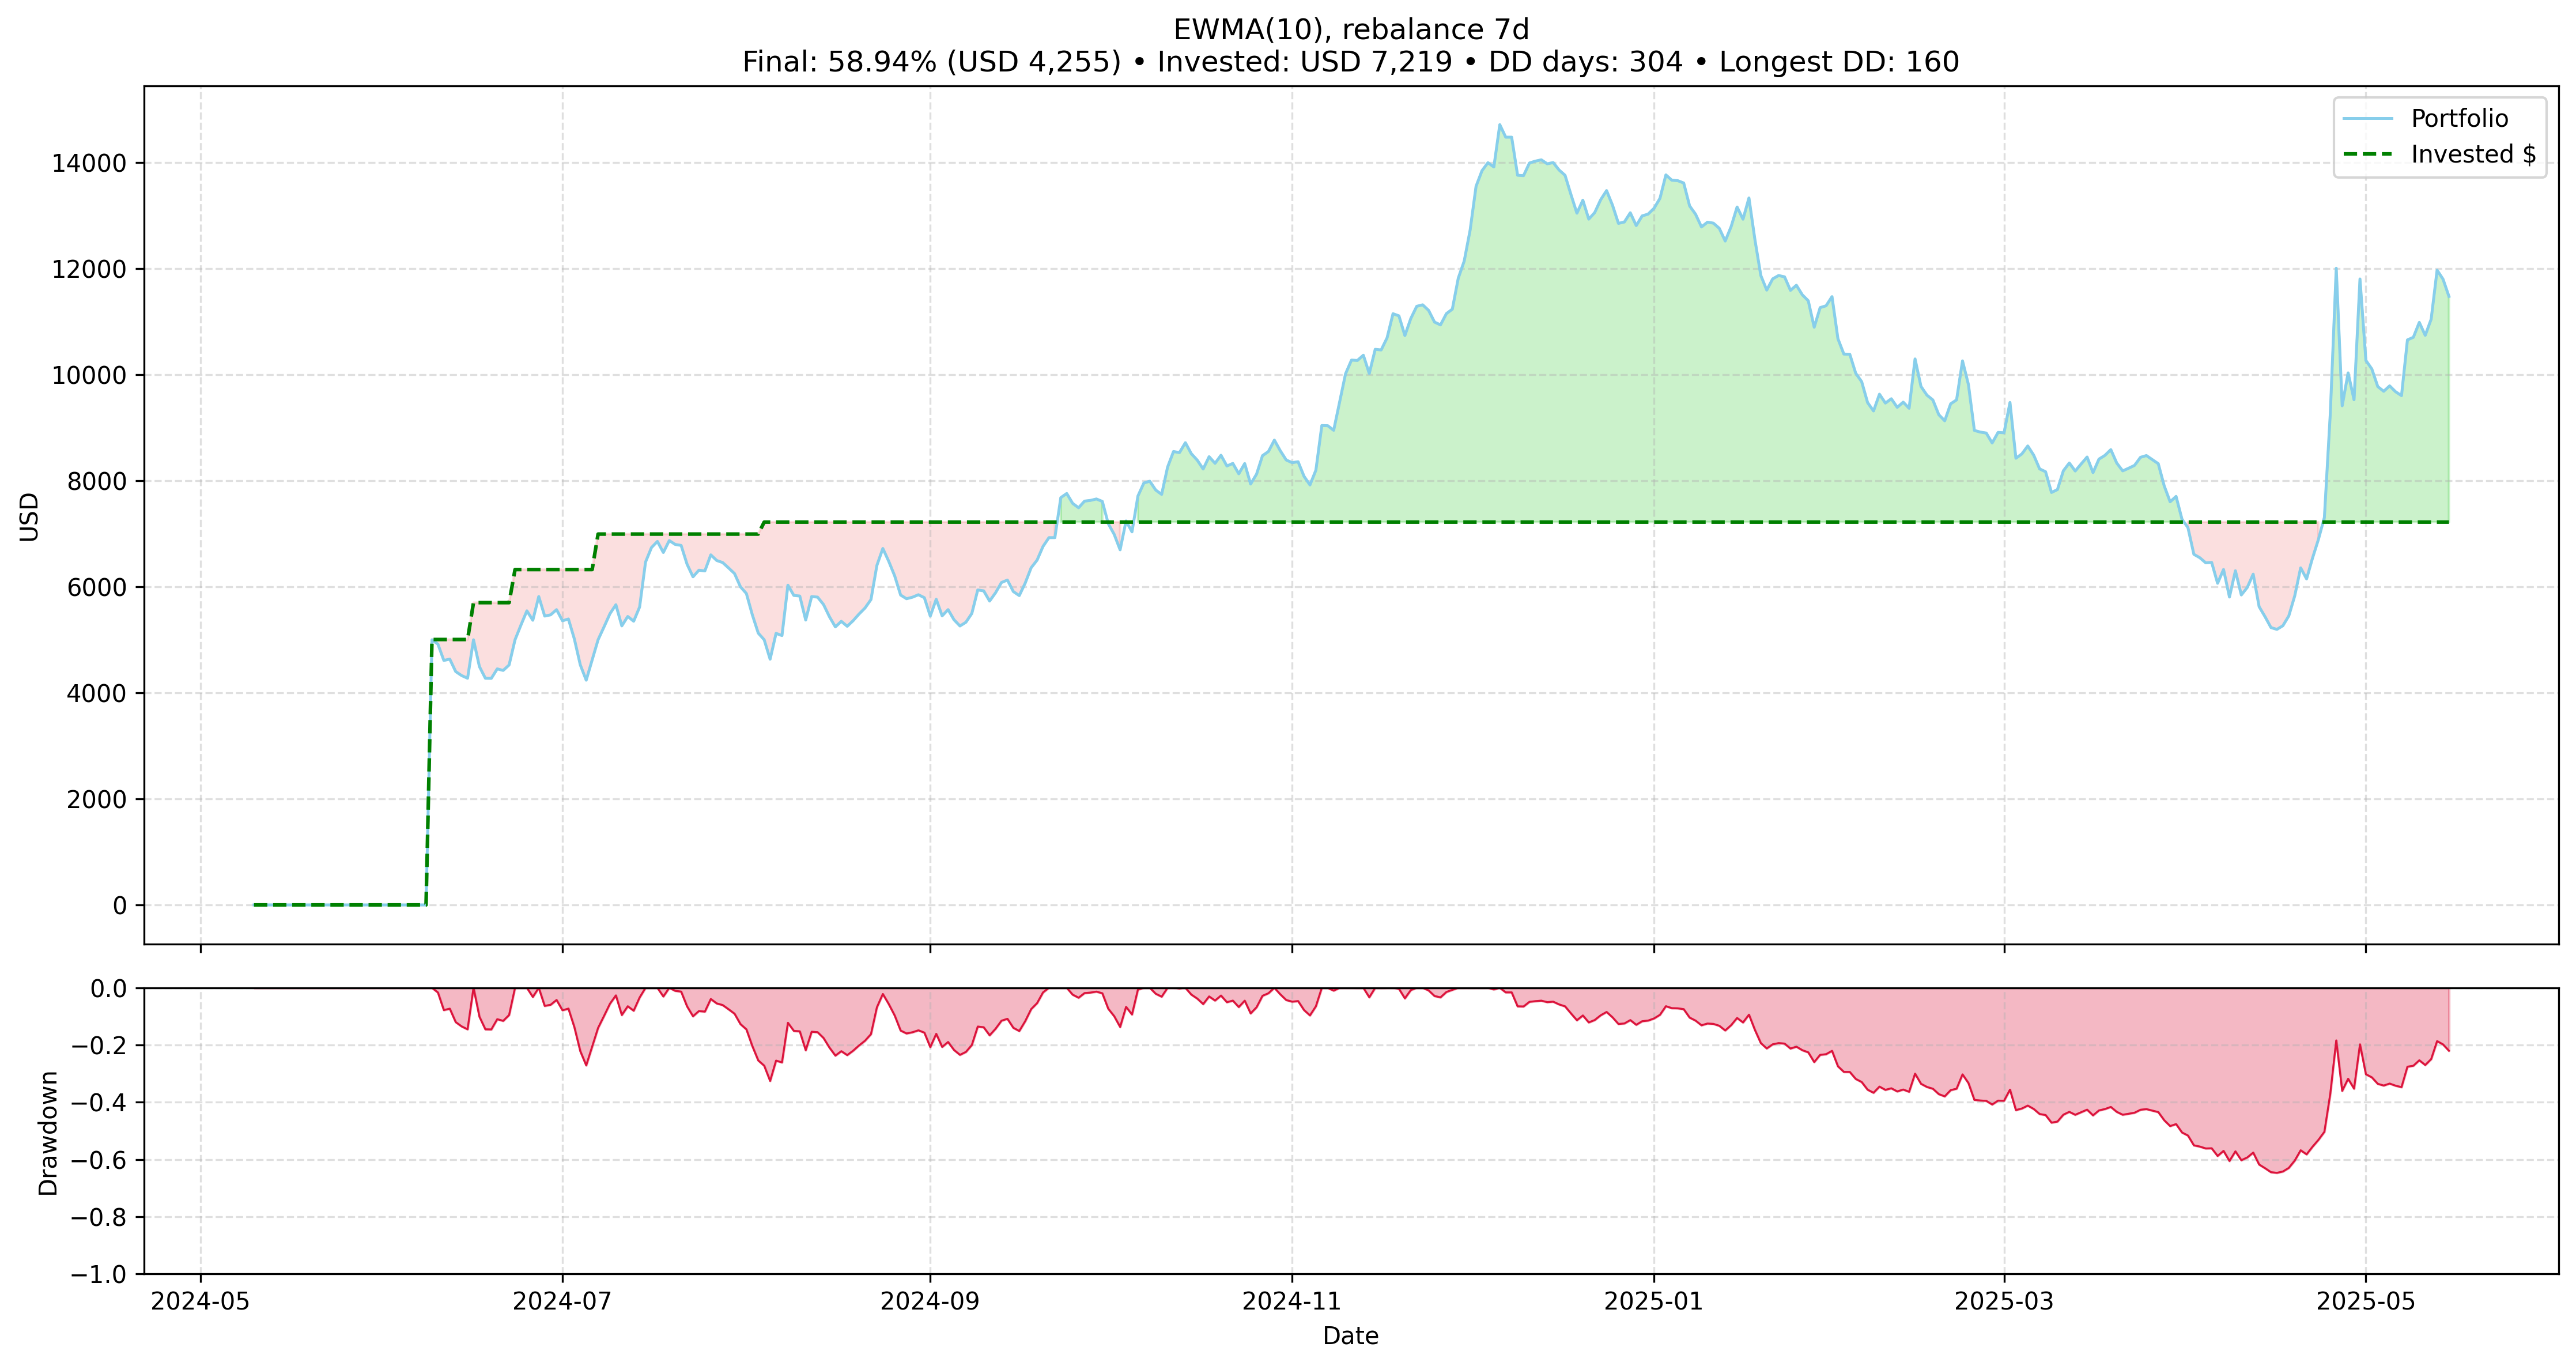

Final return      : 58.94% (USD 4,255)
Total invested    : USD 7,219
Time in drawdown  : 304 trading days
Longest DD period : 160 trading days

TOP gainers, USD
ALPACA/USDT    2,992.13
HBAR/USDT      1,374.53
SUI/USDT       1,205.18
TAO/USDT         960.11
WIF/USDT         895.89
dtype: object

TOP losers, USD
ENA/USDT     -465.85
SOL/USDT     -329.47
UNI/USDT     -266.73
LINK/USDT    -245.39
AMP/USDT     -238.67
dtype: object

Traded volume, USD: 296,943.67


In [4]:
strategy = DynamicEWMAStrategy(n_top=5, usd_per_strat=1_000, span=25)
rb = Rebalancer(data, strategy, lookback_days=30, rebalance_freq_days=7, fee_rate=0.001)

result = rb.run()    
Rebalancer.plot_equity(result.equity_curve, result.invested_curve,"EWMA(10), rebalance 7d")
Rebalancer.report_top_movers(result.total_pnl, result.traded_volume)